In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm as svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
salary = pd.read_csv("C:/Salary_data.csv")

In [5]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
salary_copy = salary.copy()

In [7]:
salary_copy

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
YearsExperience = salary_copy.drop(columns = 'Salary')

YearsExperience

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [11]:
Salary = salary_copy.drop(columns = 'YearsExperience')

Salary

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [12]:
YearsExperience

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [13]:
Salary

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


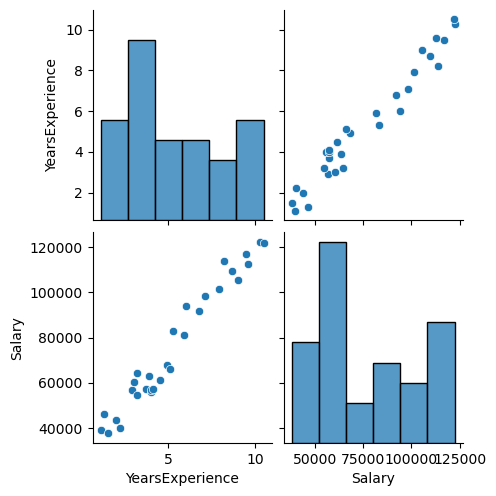

In [14]:
sns.pairplot(salary_copy, vars = ['YearsExperience', 'Salary'])

plt.show()

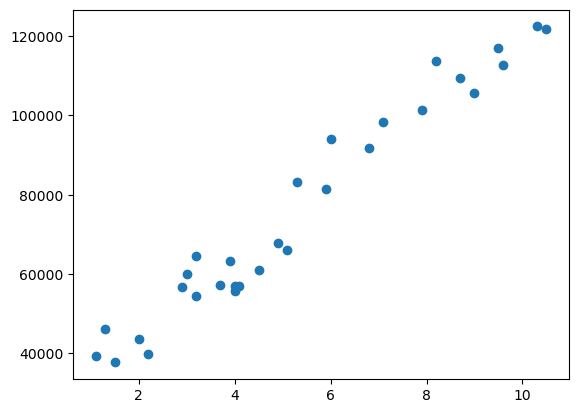

In [19]:
plt.scatter(YearsExperience, Salary)

plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(YearsExperience, Salary, random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test) 

regressor.score(X_test, y_test)

0.9779208335417602

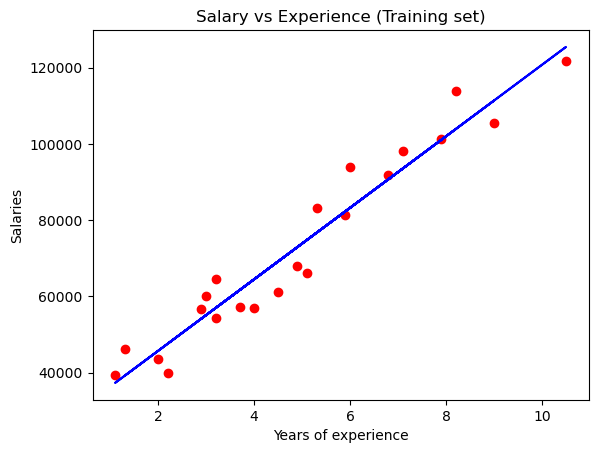

In [24]:
#plot for the TRAIN
 
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Salary vs Experience (Training set)") # stating the title of the graph
 
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph

In [28]:
dataset = pd.read_csv('C:/Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [30]:
df = dataset['YearsExperience']**2

In [31]:
YearsExperience

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [32]:
newdf = pd.concat([df, dataset])

In [17]:
train_poly = np.column_stack((X_train ** 2, X_train))
test_poly = np.column_stack((y_test ** 2, y_test))

print(train_poly.shape, test_poly.shape)

(22, 2) (8, 2)


In [22]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

print(lr.predict([[30 ** 2, 30]]))

[[315119.94137918]]


In [23]:
print(lr.coef_, lr.intercept_)

[[  11.3196933  9256.08140454]] [27249.77527577]


In [ ]:
print(regressor.predict([[10]]))